In [1]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


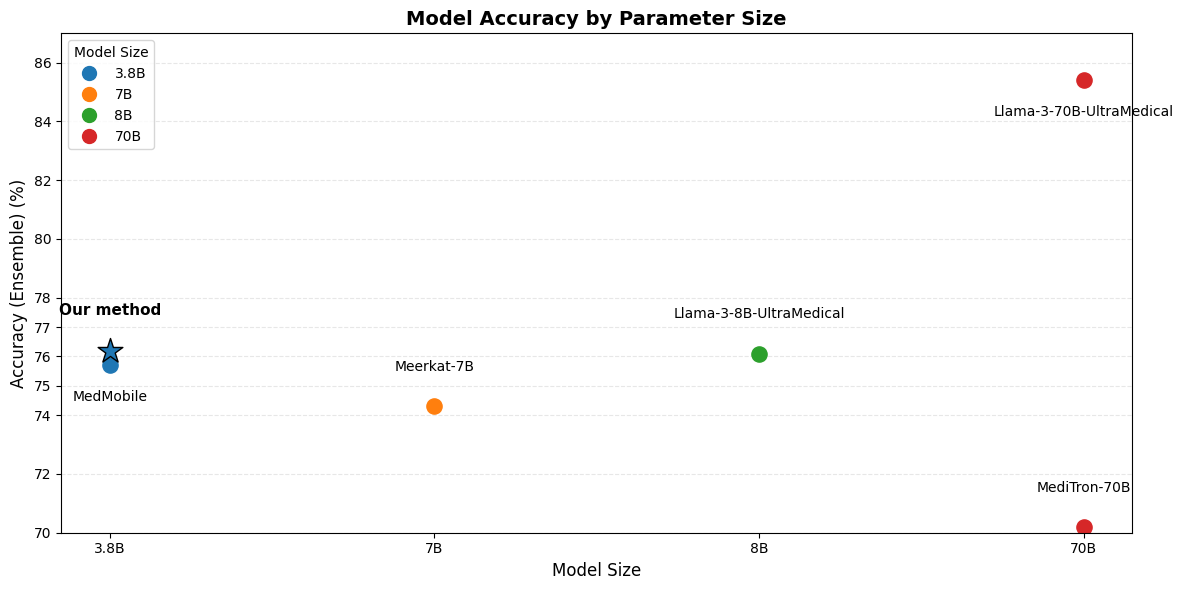

In [5]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.lines as mlines

# Data
models = [
    "Our method", "MedMobile", "Meerkat-7B",
    "Llama-3-8B-UltraMedical", "Llama-3-70B-UltraMedical", "MediTron-70B"
]
sizes = ["3.8B", "3.8B", "7B", "8B", "70B", "70B"]
acc = [76.2, 75.7, 74.3, 76.1, 85.4, 70.2]

# Unique colors per model size
size_unique = list(dict.fromkeys(sizes))
color_map = {s: plt.cm.tab10(i) for i, s in enumerate(size_unique)}

# Create proxy artists for legend
legend_handles = [
    mlines.Line2D([], [], color=color_map[size], marker='o', linestyle='None', markersize=10, label=size)
    for size in size_unique
]

plt.figure(figsize=(12, 6))

for m, s, a in zip(models, sizes, acc):
    if m == "Our method":
        # star + larger size
        plt.scatter(s, a, marker="*", s=350, color=color_map[s], edgecolor="black", linewidth=1.0, zorder=3)
        plt.text(s, a + 1.2, m, ha="center", fontsize=11, weight="bold")
    elif m in ["MedMobile", "Llama-3-70B-UltraMedical"]:
        # Move MedMobile text below the dot to avoid overlap
        plt.scatter(s, a, marker="o", s=120, color=color_map[s], zorder=2)
        plt.text(s, a - 1.2, m, ha="center", fontsize=10)
    else:
        plt.scatter(s, a, marker="o", s=120, color=color_map[s], zorder=2)
        plt.text(s, a + 1.2, m, ha="center", fontsize=10)

# Set custom y-axis limits to compress empty space and expand competitive range
plt.ylim(70,87)

# Optional: Use a custom transformation to make 70-85 more spacious
# We'll set more tick marks in the competitive range
plt.yticks([70, 72, 74, 75, 76, 77, 78, 80, 82, 84, 86])

plt.xlabel("Model Size", fontsize=12)
plt.ylabel("Accuracy (Ensemble) (%)", fontsize=12)
plt.title("Model Accuracy by Parameter Size", fontsize=14, weight="bold")

# Add grid for better readability in the competitive range
plt.grid(axis='y', alpha=0.3, linestyle='--')

plt.legend(handles=legend_handles, title="Model Size")
plt.tight_layout()
plt.show()

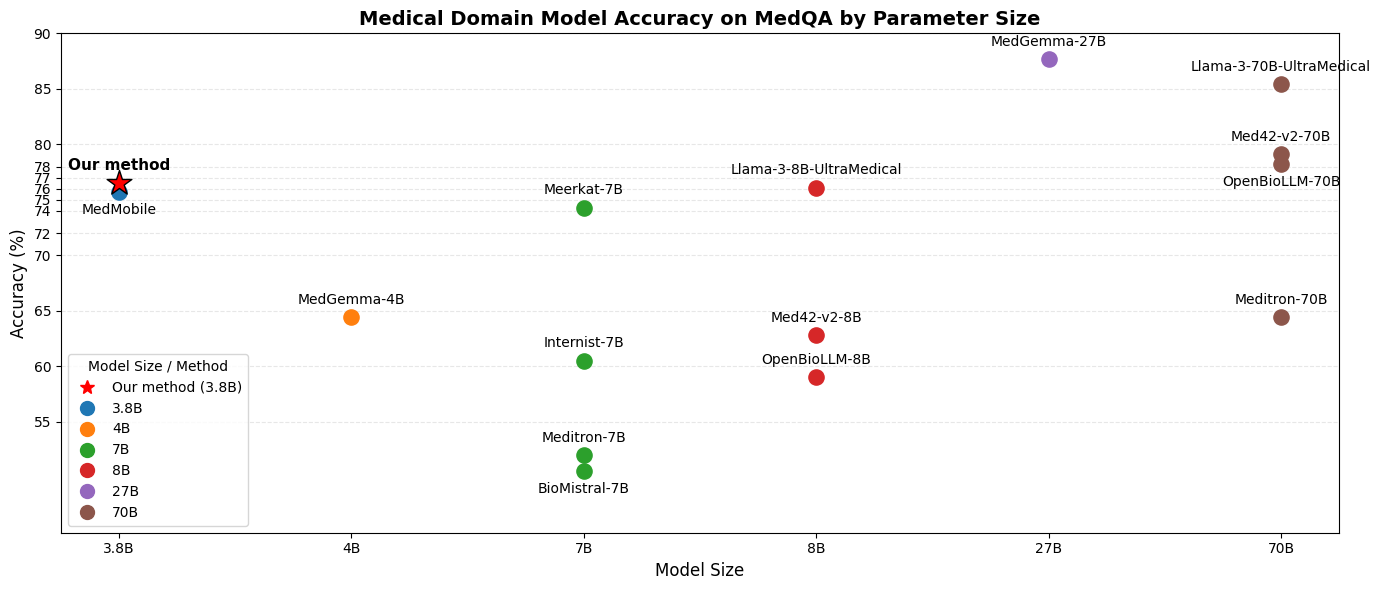

In [6]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# Data
models = [
    "Our method", "MedMobile", "MedGemma-4B", "Internist-7B", "Meditron-7B", "Meerkat-7B",
    "BioMistral-7B", "OpenBioLLM-8B", "Med42-v2-8B",
    "Llama-3-8B-UltraMedical", "MedGemma-27B", "OpenBioLLM-70B", "Med42-v2-70B",
    "Llama-3-70B-UltraMedical", "Meditron-70B"
]
sizes = [
    "3.8B", "3.8B", "4B", "7B", "7B", "7B",
    "7B", "8B", "8B",
    "8B", "27B", "70B", "70B",
    "70B", "70B"
]
acc = [
    76.5, 75.7, 64.4, 60.5, 52, 74.3,
    50.6, 59, 62.8,
    76.1, 87.7, 78.2, 79.1,
    85.4, 64.4
]

# Unique colors per model size (excluding "Our method")
size_unique = list(dict.fromkeys(sizes))
color_map = {s: plt.cm.tab10(i) for i, s in enumerate(size_unique)}

# Assign a separate color for "Our method"
our_method_color = "red"

# Create proxy artists for legend
legend_handles = [mlines.Line2D([], [], color=our_method_color, marker='*', linestyle='None', markersize=10, label="Our method (3.8B)")] + [
    mlines.Line2D([], [], color=color_map[size], marker='o', linestyle='None', markersize=10, label=size)
    for size in size_unique
]

plt.figure(figsize=(14, 6))

for m, s, a in zip(models, sizes, acc):
    if m == "Our method":
        # star + unique color
        plt.scatter(s, a, marker="*", s=350, color=our_method_color, edgecolor="black", linewidth=1.0, zorder=3)
        plt.text(s, a + 1.2, m, ha="center", fontsize=11, weight="bold")
    elif m in ["MedMobile", "BioMistral-7B", "OpenBioLLM-70B"]:
        plt.scatter(s, a, marker="o", s=120, color=color_map[s], zorder=2)
        plt.text(s, a - 2, m, ha="center", fontsize=10)
    else:
        plt.scatter(s, a, marker="o", s=120, color=color_map[s], zorder=2)
        plt.text(s, a + 1.2, m, ha="center", fontsize=10)

plt.ylim(45, 90)
# plt.yticks(list(range(45, 91, 5)))
plt.yticks([55, 60, 65, 70, 72, 74, 75, 76, 77, 78, 80, 85, 90])
plt.xlabel("Model Size", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.title("Medical Domain Model Accuracy on MedQA by Parameter Size", fontsize=14, weight="bold")
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.legend(handles=legend_handles, title="Model Size / Method")
plt.tight_layout()
plt.show()



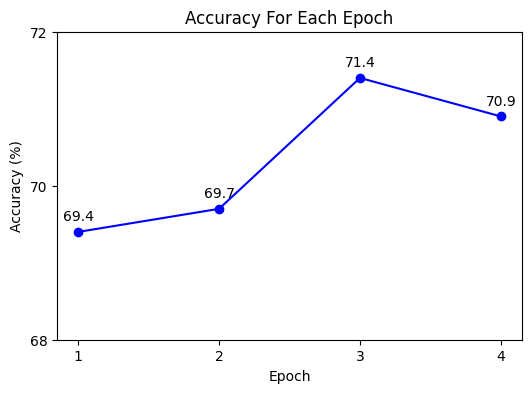

In [1]:
import matplotlib.pyplot as plt

# Data
epochs = [1, 2, 3, 4]
accuracy = [69.4, 69.7, 71.4, 70.9]

# Plot
plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, marker='o', linestyle='-', color='b')

# Axis ticks
plt.xticks([1, 2, 3, 4])
plt.yticks([68, 70, 72])

# Remove grid
plt.grid(False)

# Labels and title
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy on MedQA for each epoch')

# Annotate each point
for x, y in zip(epochs, accuracy):
    plt.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0, 8), ha='center')

plt.show()

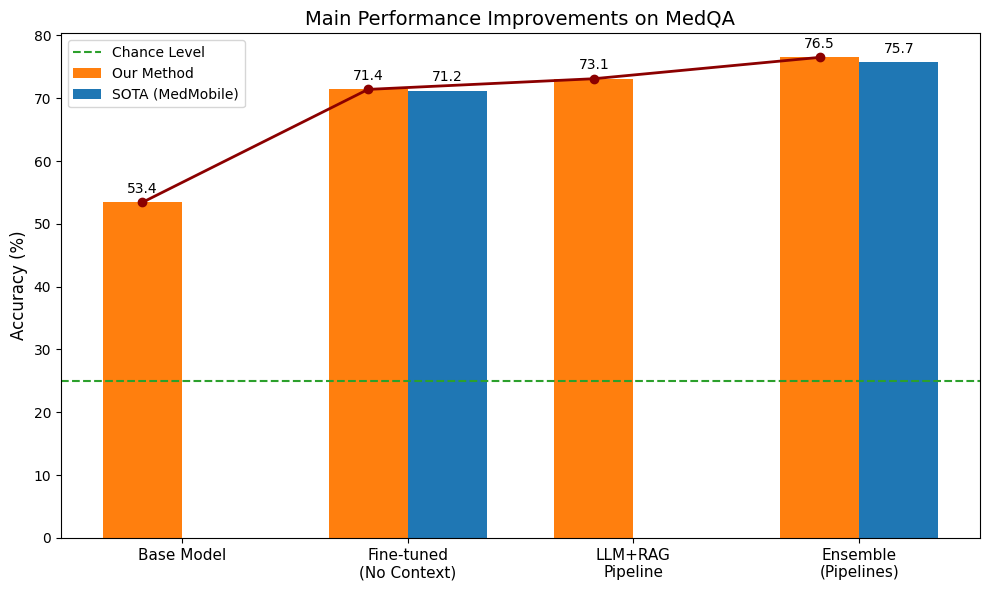

In [2]:
# Bar Plot
import matplotlib.pyplot as plt
import numpy as np

# Data
methods = [
    "Base Model",
    "Fine-tuned\n(No Context)",
    "LLM+RAG\nPipeline",
    "Ensemble\n(Pipelines)"
]

ours = [53.4, 71.4, 73.1, 76.5]
sota = [None, 71.2, None, 75.7]

x = np.arange(len(methods))
width = 0.35  # bar width

fig, ax = plt.subplots(figsize=(10, 6))

# --- OUR RESULTS (C1 bars) ---
bars1 = ax.bar(x - width/2, ours, width, label="Our Method", color="C1")

# --- SOTA RESULTS (C0 bars) ---
# Only plot SOTA bars where values exist
sota_x = []
sota_values = []
for i, v in enumerate(sota):
    if v is not None:
        sota_x.append(x[i] + width/2)
        sota_values.append(v)

bars2 = ax.bar(sota_x, sota_values, width, label="SOTA (MedMobile)", color="C0")

# --- Add chance level line with different color ---
ax.axhline(25, linestyle="--", linewidth=1.5, color="C2", label="Chance Level")

# --- TREND LINE FOR OUR METHOD ---
# Get center x positions of blue bars
blue_centers = x - width/2
ax.plot(
    blue_centers,
    ours,
    marker="o",
    linestyle="-",
    linewidth=2,
    color="darkred",  # Changed to a different color from C1
    markersize=6
)

# Labels & formatting
ax.set_ylabel("Accuracy (%)", fontsize=12)
ax.set_title("Main Performance Improvements on MedQA", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(methods, fontsize=11)
ax.legend()

# Annotate bar values
def annotate_bars(bars, data):
    for bar, value in zip(bars, data):
        if value is not None:
            height = bar.get_height()
            ax.text(
                bar.get_x() + bar.get_width()/2,
                height + 1,
                f"{value:.1f}",
                ha="center",
                va="bottom",
                fontsize=10
            )

annotate_bars(bars1, ours)

# Annotate SOTA bars separately
for bar, value in zip(bars2, sota_values):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height + 1,
        f"{value:.1f}",
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.tight_layout()
plt.show()